In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

sns.set_style('whitegrid')

C:\Users\sumit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature to be used

*Independent Features*

1. Pclass: Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
2. Sex
3. Age
4. SibSp -- # of siblings / spouses aboard the Titanic
5. Parch -- # of parents / children aboard the Titanic
6. Fare

*Dependent Feature* 
- Survived -- 0 = No, 1 = Yes

In [3]:
titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [4]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [6]:
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

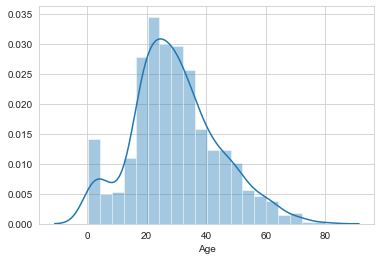

In [7]:
sns.distplot(titanic['Age'].dropna())

### we can see that the Age feature is fairly a Guassian ditribution. Also there is no such outlier. Hence, we can replace the null values with the mean age

In [8]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [9]:
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

<BarContainer object of 3 artists>

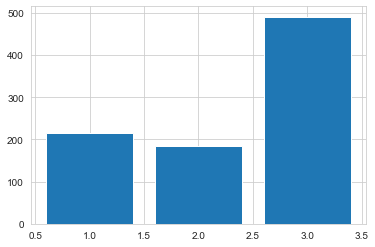

In [10]:
a = titanic['Pclass'].value_counts()
plt.bar(a.index,a.values)

<BarContainer object of 2 artists>

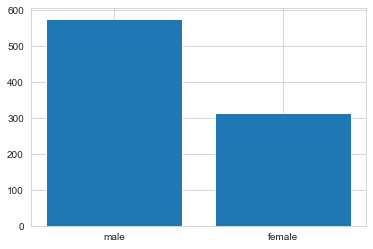

In [11]:
a = titanic['Sex'].value_counts()
plt.bar(a.index,a.values)

<BarContainer object of 7 artists>

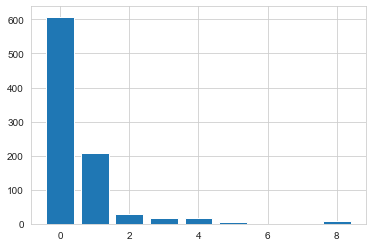

In [12]:
a = titanic['SibSp'].value_counts()
plt.bar(a.index,a.values)

<BarContainer object of 7 artists>

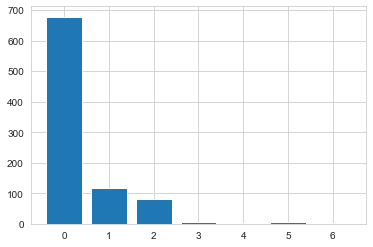

In [13]:
a = titanic['Parch'].value_counts()
plt.bar(a.index,a.values)

<BarContainer object of 2 artists>

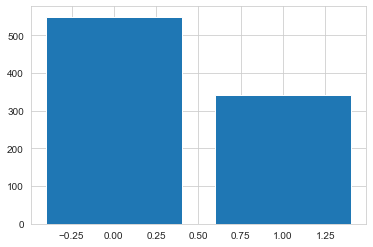

In [14]:
a = titanic['Survived'].value_counts()
plt.bar(a.index,a.values)

In [15]:
Gender = pd.crosstab(index=titanic['Sex'],columns=titanic['Survived'])
Gender

Survived,0,1
Sex,,
female,81,233
male,468,109


In [16]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


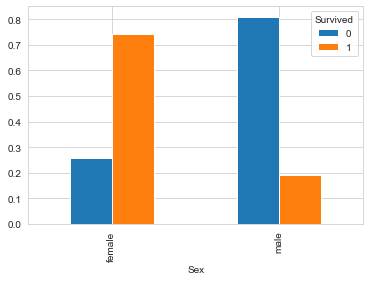

In [17]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot.bar(stacked=False)

* We can clearly see that percentage of females survived more as compared to males

In [18]:
print('Max Age : {}'.format(titanic['Age'].max()))
print('Min Age : {}'.format(titanic['Age'].min()))

Max Age : 80.0
Min Age : 0.42


#### Let's categorise the Age Feature as children, Youth, Adult,Seniors

In [19]:
category = ['Children','Youth','Adult','Seniors']

for item in titanic:
    titanic['AgeCategory'] = pd.cut(titanic['Age'], bins=[0,14,24,64,81], labels = category)
   

In [20]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeCategory
0,3,male,22.0,1,0,7.2500,0,Youth
1,1,female,38.0,1,0,71.2833,1,Adult
2,3,female,26.0,0,0,7.9250,1,Adult
3,1,female,35.0,1,0,53.1000,1,Adult
4,3,male,35.0,0,0,8.0500,0,Adult


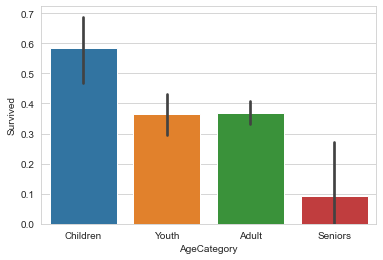

In [21]:
sns.barplot(x='AgeCategory', y='Survived',data = titanic)

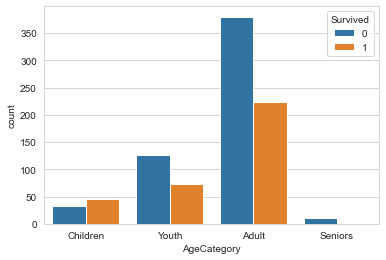

In [22]:
sns.countplot(x='AgeCategory',hue='Survived',data = titanic)

### Ticket class vs Survived

In [23]:
Class = pd.crosstab(index = titanic['Pclass'],columns = titanic['Survived'])
Class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


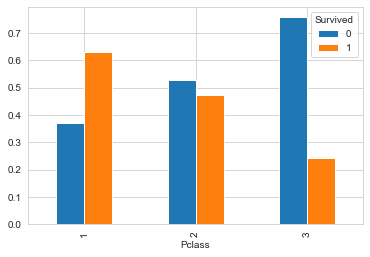

In [24]:
Class.div(Class.sum(1).astype(float),axis=0).plot.bar(stacked = False)

1. We can observe that around 65% of people survived having class-1 ticket.
2. For Class-2, it was 45-55 percent chances.
3. For class-3, the survival rate was very low i.e, near to 25%

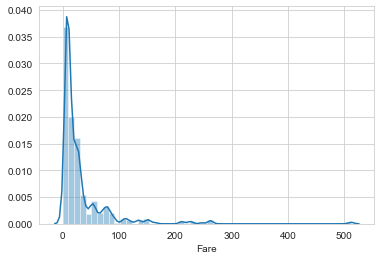

In [25]:
sns.distplot(titanic['Fare'])

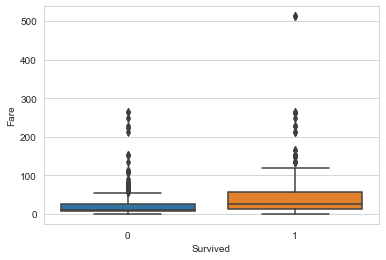

In [26]:
sns.boxplot( y= 'Fare',x='Survived',data=titanic,orient='v')

* We can see that there are many outliers in the Fare distribution*

#### Let's divide the fare in some categories an then also see that if Pclass and Fare are related or not

In [27]:
categories = ['Low Fare','Medium Fare','Average Fare','High Fare']

for item in titanic:
    titanic['FareCategory'] = pd.cut(titanic['Fare'],bins=[0,10,50,100,550],labels = categories)
    
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeCategory,FareCategory
0,3,male,22.0,1,0,7.2500,0,Youth,Low Fare
1,1,female,38.0,1,0,71.2833,1,Adult,Average Fare
2,3,female,26.0,0,0,7.9250,1,Adult,Low Fare
3,1,female,35.0,1,0,53.1000,1,Adult,Average Fare
4,3,male,35.0,0,0,8.0500,0,Adult,Low Fare


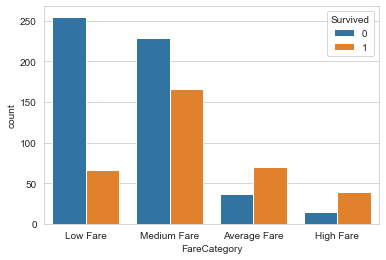

In [28]:
sns.countplot(x='FareCategory',hue='Survived',data=titanic)

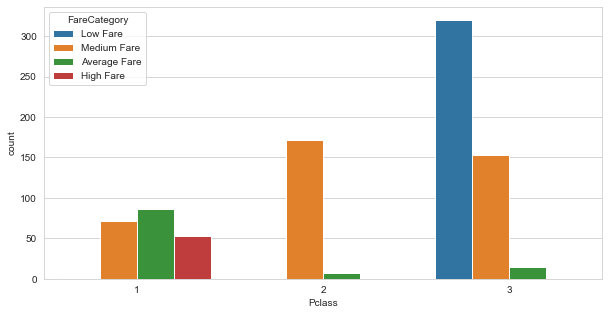

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Pclass',hue='FareCategory',data=titanic)

*From 1st barplot above: *
1. 60-70% people survived having higher fare.
2. Only 20-30% People survived having low fare.

*From 2nd Barplot above: *
1. People belonging to 1st class have been charged high fare.
2. People belonging to 2nd class have medium fare.
3. People belonging to 3rd class have low fare and are less likely to survive.



In [30]:
### Checking SibPs and Parch features

1. sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)




2. parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

##### Let us combine both the feature and form a single feature and then see if it is anyway related to the survival of the passenger.

In [31]:
for item in titanic:
    titanic['Family'] = titanic['SibSp']+titanic['Parch']+1

titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeCategory,FareCategory,Family
0,3,male,22.0,1,0,7.2500,0,Youth,Low Fare,2
1,1,female,38.0,1,0,71.2833,1,Adult,Average Fare,2
2,3,female,26.0,0,0,7.9250,1,Adult,Low Fare,1
3,1,female,35.0,1,0,53.1000,1,Adult,Average Fare,2
4,3,male,35.0,0,0,8.0500,0,Adult,Low Fare,1


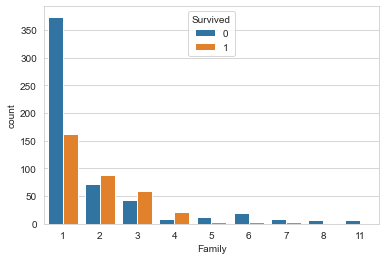

In [32]:
sns.countplot(x='Family',hue='Survived',data=titanic)

1. We can conclde that the family of 2,3,4 have higher probability of suriving.
2. On the otherhand, People who were travelling alone had very less probability of surviving.

#### Let us see how the fetures are correlated to the dependent feature

In [33]:
titanic.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Family      0.016639
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

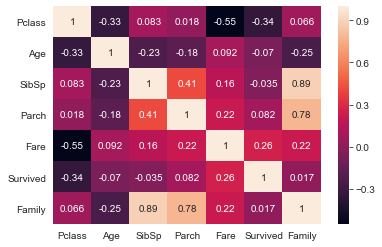

In [34]:
sns.heatmap(data=titanic.corr(),annot = True)

# Feature Engineering

In [35]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeCategory,FareCategory,Family
0,3,male,22.0,1,0,7.2500,0,Youth,Low Fare,2
1,1,female,38.0,1,0,71.2833,1,Adult,Average Fare,2
2,3,female,26.0,0,0,7.9250,1,Adult,Low Fare,1
3,1,female,35.0,1,0,53.1000,1,Adult,Average Fare,2
4,3,male,35.0,0,0,8.0500,0,Adult,Low Fare,1


In [36]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})

In [37]:
category = ['Children','Youth','Adult','Seniors']

titanic['AgeCategory'] = titanic['AgeCategory'].map({'Children':1,'Youth':2,'Adult':3,'Seniors':4})


In [38]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeCategory,FareCategory,Family
0,3,0,22.0,1,0,7.2500,0,2,Low Fare,2
1,1,1,38.0,1,0,71.2833,1,3,Average Fare,2
2,3,1,26.0,0,0,7.9250,1,3,Low Fare,1
3,1,1,35.0,1,0,53.1000,1,3,Average Fare,2
4,3,0,35.0,0,0,8.0500,0,3,Low Fare,1


In [39]:
drop_columns = ['Age','SibSp','Parch','Fare','FareCategory']

titanic = titanic.drop(drop_columns,axis=1)
titanic.head()

,Pclass,Sex,Survived,AgeCategory,Family
0,3,0,0,2,2
1,1,1,1,3,2
2,3,1,1,3,1
3,1,1,1,3,2
4,3,0,0,3,1


### Splitting the dataset into training and test set

In [40]:
X = titanic.drop(['Survived'],axis=1)
y =titanic['Survived']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
pred = dtc.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.8022388059701493

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test,pred)
cnf_matrix

array([[153,  12],
       [ 41,  62]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

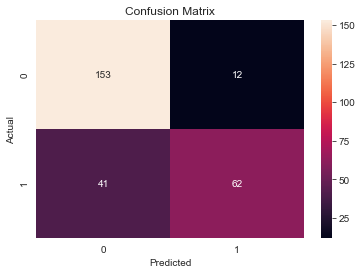

In [45]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [46]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       165
           1       0.84      0.60      0.70       103

    accuracy                           0.80       268
   macro avg       0.81      0.76      0.78       268
weighted avg       0.81      0.80      0.79       268



### Hyperparameter tuning using RandomizedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 50,100]
min_samples_leaf = [1, 2, 5, 10]



In [48]:
random_grid = {'criterion':criterion,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 50, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
dt_random = RandomizedSearchCV(estimator = dtc, 
                               param_distributions = random_grid,
                               scoring='accuracy', 
                               n_iter = 50, 
                               cv = 5, 
                               verbose=2, 
                               n_jobs = 1)



In [50]:
dt_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy 
[CV]  min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy 
[CV]  min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy 
[CV]  min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy 
[CV]  min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy 
[CV]  min_samples_split=50, min_samples_leaf=2, max_depth=15, criterion=entropy, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=10, max_depth=10, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] min_samples_split=50, min_samples_leaf=5, max_depth=10, criterion=gini 
[CV]  min_samples_split=50, min_samples_leaf=5, max_depth=10, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=2, max_depth=5, criterio

[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini 
[CV]  min_samples_split=5, min_samples_leaf=2, max_depth=25, criterion=gini, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=1, max_depth=20, criterion=gini 
[CV]  min_samples_split=15, min_samples_leaf=1, max_depth=20, criterion=gini, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=1, max_depth=20, criterion=gini 
[CV]  min_samples_split=15, min_samples_leaf=1, max_depth=20, criterion=gini, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=1, max_depth=20, criterion

[CV]  min_samples_split=5, min_samples_leaf=10, max_depth=5, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_depth=5, criterion=entropy, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=5, max_dep

[CV]  min_samples_split=10, min_samples_leaf=10, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=10, max_depth=20, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=10, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini 
[CV]  min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini 
[CV]  min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini 
[CV]  min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini 
[CV]  min_samples_split=50, min_samples_leaf=10, max_depth=15, criterion=gini, total=   0.0s
[CV] min_samples_split=50, min_samples_leaf

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [51]:
random_pred = dt_random.predict(X_test)

In [52]:
metrics.accuracy_score(y_test,random_pred)

0.835820895522388

In [53]:
random_cnf_matrix = metrics.confusion_matrix(y_test,random_pred)
random_cnf_matrix

array([[158,   7],
       [ 37,  66]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

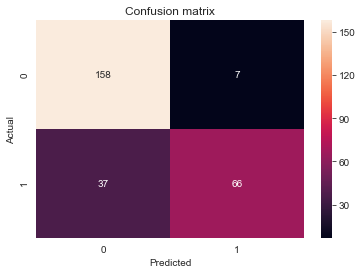

In [54]:
sns.heatmap(pd.DataFrame(random_cnf_matrix),annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')

In [55]:
print(metrics.classification_report(y_test,random_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       165
           1       0.90      0.64      0.75       103

    accuracy                           0.84       268
   macro avg       0.86      0.80      0.81       268
weighted avg       0.85      0.84      0.83       268



### Comparing the models after hyperparameter tuning

In [56]:
print("Accuracy before tuning: {}".format(metrics.accuracy_score(y_test,pred)))
print("Accuracy after tuning : {}".format(metrics.accuracy_score(y_test,random_pred)))


Accuracy before tuning: 0.8022388059701493
Accuracy after tuning : 0.835820895522388


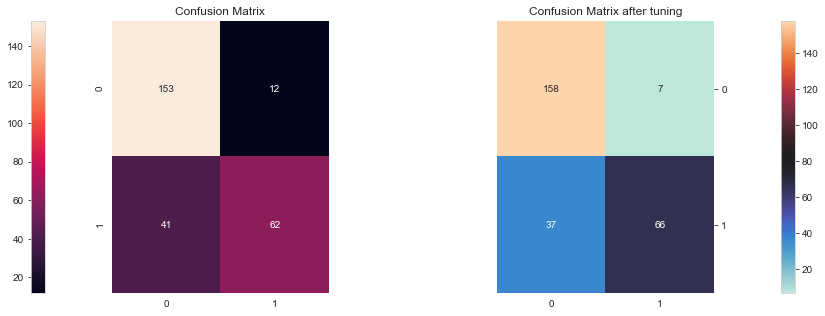

In [57]:
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(15,5))
fig.subplots_adjust(wspace=0.5)
sns.heatmap(pd.DataFrame(cnf_matrix), cmap="rocket", ax=ax, cbar=False,annot=True,fmt='g')
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
ax.set_title('Confusion Matrix')
sns.heatmap(pd.DataFrame(random_cnf_matrix), cmap="icefire", ax=ax2, cbar=False,annot=True,fmt='g')
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
ax2.set_title('Confusion Matrix after tuning')
plt.show()

In [58]:
print("F1-Score before tuning: {}".format(metrics.f1_score(y_test,pred)))
print("F1-Score after tuning : {}".format(metrics.f1_score(y_test,random_pred)))

F1-Score before tuning: 0.7005649717514123
F1-Score after tuning : 0.75
